## S-109A Milestone 3

## Twitter Bot Detection EDA

**Summer 2018**<br>
**Contributers:** Vivek Mishra and Karan Bhandarkar


In [39]:
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
import json
import numpy as np # imports a fast numerical programming library
import scipy as sp #imports stats functions, amongst other things
import matplotlib as mpl # this actually imports matplotlib
import matplotlib.cm as cm #allows us easy access to colormaps
import matplotlib.pyplot as plt #sets up plotting under plt
import pandas as pd #lets us handle data as dataframes
#sets up pandas table display
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
from bs4 import BeautifulSoup
import re
#import unidecode
from pandas.plotting import scatter_matrix
from wordcloud import WordCloud, STOPWORDS

In [ ]:
import config # User-defined config file
plt.rcParams.update(config.pars) # Update rcParams to make nice plots

<HR>
Read the datasets created into DataFrames

In [3]:
account_full_DF = pd.read_json("data/account_details.json", lines=True)
tweets_full_DF = pd.read_json("data/tweets.json", lines=True)

In [5]:
tweets_full_DF.head()

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,id,id_str,in_reply_to_screen_name,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,isBot,is_quote_status,lang,name,place,possibly_sensitive,quoted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,retweet_count,retweeted,source,truncated,user
0,NaN,None,2018-07-27 23:13:27,"[0, 72]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,0,False,What Is Scroll Cryptocurrency? https://t.co/dg...,None,1022983334996135936,1022983334996135936,NaN,NaN,NaN,NaN,NaN,1,False,en,FintechBot,None,0.0,NaN,NaN,NaN,NaN,2,False,"<a href=""http://www.adendavies.com"" rel=""nofol...",False,"{'id': 21287212, 'id_str': '21287212', 'name':..."
1,NaN,None,2018-07-27 22:45:09,"[0, 110]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,1,False,Coinbase Enables European Customers to Buy Vir...,None,1022976213306957824,1022976213306957824,NaN,NaN,NaN,NaN,NaN,1,False,en,FintechBot,None,0.0,NaN,NaN,NaN,NaN,1,False,"<a href=""https://dlvrit.com/"" rel=""nofollow"">d...",False,"{'id': 21287212, 'id_str': '21287212', 'name':..."
2,NaN,None,2018-07-27 22:29:29,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,0,False,NHS Digital leading the protection of patient ...,None,1022972269113556994,1022972269113556992,NaN,NaN,NaN,NaN,NaN,1,False,en,FintechBot,None,0.0,NaN,NaN,NaN,NaN,0,False,"<a href=""http://www.adendavies.com"" rel=""nofol...",False,"{'id': 21287212, 'id_str': '21287212', 'name':..."
3,NaN,None,2018-07-27 22:13:28,"[0, 100]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,0,False,Top 3 Companies Using Blockchain in the Solar ...,None,1022968239415087104,1022968239415087104,NaN,NaN,NaN,NaN,NaN,1,False,en,FintechBot,None,0.0,NaN,NaN,NaN,NaN,0,False,"<a href=""http://www.adendavies.com"" rel=""nofol...",False,"{'id': 21287212, 'id_str': '21287212', 'name':..."
4,NaN,None,2018-07-27 21:13:29,"[0, 115]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,0,False,"VC Firms Are Betting on the Technology, Not on...",None,1022953141304795141,1022953141304795136,NaN,NaN,NaN,NaN,NaN,1,False,en,FintechBot,None,0.0,NaN,NaN,NaN,NaN,2,False,"<a href=""http://www.adendavies.com"" rel=""nofol...",False,"{'id': 21287212, 'id_str': '21287212', 'name':..."


In [6]:
account_full_DF.head()

,contributors_enabled,created_at,default_profile,default_profile_image,description,entities,favourites_count,follow_request_sent,followers_count,following,friends_count,geo_enabled,has_extended_profile,id,id_str,isBot,is_translation_enabled,is_translator,lang,listed_count,location,name,notifications,profile_background_color,profile_background_image_url,profile_background_image_url_https,profile_background_tile,profile_banner_url,profile_image_url,profile_image_url_https,profile_link_color,profile_location,profile_sidebar_border_color,profile_sidebar_fill_color,profile_text_color,profile_use_background_image,protected,screen_name,status,statuses_count,time_zone,translator_type,url,utc_offset,verified
0,False,2009-02-19 10:03:21,False,False,A little twitter bot for all the latest financ...,{'url': {'urls': [{'url': 'http://t.co/shU9Ofw...,259,NaN,9150,NaN,992,False,False,21287212,21287212,1,False,False,en,1026,"Sheffield, England",FintechBot,NaN,1A1B1F,http://abs.twimg.com/images/themes/theme9/bg.gif,https://abs.twimg.com/images/themes/theme9/bg.gif,True,NaN,http://pbs.twimg.com/profile_images/9048513349...,https://pbs.twimg.com/profile_images/904851334...,19CF86,"{'id': '07e9c7d1954fff64', 'url': 'https://api...",181A1E,252429,666666,True,False,FintechBot,{'created_at': 'Fri Jul 27 23:13:27 +0000 2018...,113719,NaN,none,http://t.co/shU9OfwfD8,NaN,False
1,False,2017-02-08 04:35:48,True,False,"2018 Federal/CA candidacy/committee filings, c...",{'url': {'urls': [{'url': 'https://t.co/XHsD8f...,12,NaN,1431,NaN,1,False,False,829186945267834880,829186945267834880,1,False,False,en,44,"The Cloud, CA",CATargetBot,NaN,F5F8FA,None,None,False,https://pbs.twimg.com/profile_banners/82918694...,http://pbs.twimg.com/profile_images/9233073966...,https://pbs.twimg.com/profile_images/923307396...,1DA1F2,None,C0DEED,DDEEF6,333333,True,False,CATargetBot,{'created_at': 'Sat Jul 28 00:30:05 +0000 2018...,18981,NaN,none,https://t.co/XHsD8f9rGH,NaN,False
2,False,2018-01-08 16:38:35,True,False,UK Investment Information from a variety of fe...,{'description': {'urls': []}},0,NaN,7,NaN,14,False,False,950406387632402433,950406387632402432,1,False,False,en,0,United Kingdom,Finance Feed,NaN,F5F8FA,None,None,False,https://pbs.twimg.com/profile_banners/95040638...,http://pbs.twimg.com/profile_images/9518350970...,https://pbs.twimg.com/profile_images/951835097...,1DA1F2,"{'id': '6416b8512febefc9', 'url': 'https://api...",C0DEED,DDEEF6,333333,True,False,InvestorNewsBot,{'created_at': 'Fri Jul 27 16:01:05 +0000 2018...,7320,NaN,none,None,NaN,False
3,False,2011-11-08 10:54:31,True,False,#ForexTrading #ForexRobots,{'url': {'urls': [{'url': 'https://t.co/EQbbvN...,6,NaN,30851,NaN,33827,True,False,407659112,407659112,1,False,False,en,494,Riga,Forex Trading Bots,NaN,C0DEED,http://abs.twimg.com/images/themes/theme1/bg.png,https://abs.twimg.com/images/themes/theme1/bg.png,False,https://pbs.twimg.com/profile_banners/40765911...,http://pbs.twimg.com/profile_images/9670717406...,https://pbs.twimg.com/profile_images/967071740...,1DA1F2,None,C0DEED,DDEEF6,333333,True,False,FxTradingBot,{'created_at': 'Sat Jul 28 00:30:01 +0000 2018...,109179,NaN,none,https://t.co/EQbbvN1nWT,NaN,False
4,False,2017-09-08 05:07:29,True,False,Tweeting out the companies Alaskans own in the...,{'url': {'urls': [{'url': 'https://t.co/cum0F6...,1,NaN,175,NaN,0,False,False,906021147015135232,906021147015135232,1,False,False,en,1,"Anchorage, AK",PFD Bot,NaN,F5F8FA,None,None,False,https://pbs.twimg.com/profile_banners/90602114...,http://pbs.twimg.com/profile_images/9117990221...,https://pbs.twimg.com/profile_images/911799022...,1DA1F2,"{'id': '7a863bb88e5bb33c', 'url': 'https://api...",C0DEED,DDEEF6,333333,True,False,pfdbot,{'created_at': 'Sat Jul 28 00:30:28 +0000 2018...,25733,NaN,none,https://t.co/cum0F6SCOd,NaN,False


<HR>
Discard cells that don't need to be included for analysis.

In [7]:
accountDF = account_full_DF[['id','isBot','name','id_str','screen_name','location','description','url','following','followers_count','friends_count','listed_count','created_at','favourites_count','verified','statuses_count','lang','status','default_profile','default_profile_image','has_extended_profile']]
tweetsDF = tweets_full_DF[['name','isBot','full_text','lang','created_at','retweeted','entities','coordinates','retweet_count','favorite_count','place','geo','is_quote_status']]

In [8]:
print("Number of Tweets that we have is {} and number of accounts that we have is {}".format(len(tweetsDF), len(accountDF)))

Number of Tweets that we have is 10396 and number of accounts that we have is 100


<HR>
The user account dataset is not large enough. We bootstrap by picking random samples from what we have, to increase the size of the dataset.<BR>First we segregate the dataset into bots and non-bots so that we can have equal representation in our final dataset. Then we combine the two bootstrapped sets, shuffle them up and re-index.<BR><BR>
This is not a problem for tweets, but we do need to shuffle since user tweets are grouped together, so we just shuffle and reindex that dataframe. 

In [13]:
bot_accountDF = accountDF.loc[accountDF['isBot']==1].sample(frac=40, replace=True)
nonbot_accountDF = accountDF.loc[accountDF['isBot']==0].sample(frac=40, replace=True)
accountDF = pd.concat([bot_accountDF, nonbot_accountDF]).sample(frac=1).reset_index(drop=True)

tweetsDF = tweetsDF.sample(frac=1).reset_index(drop=True)

** Let's reexamine the data frame ** 

In [14]:
tweetsDF.head()

,name,isBot,full_text,lang,created_at,retweeted,entities,coordinates,retweet_count,favorite_count,place,geo,is_quote_status
0,iancassel,0,You know your culture is an asset when the com...,en,2018-07-20 02:54:00,False,"{'hashtags': [], 'symbols': [], 'user_mentions...",None,56,252,None,None,False
1,patrick_oshag,0,If you need something to talk about at your BB...,en,2018-07-04 14:17:09,False,"{'hashtags': [], 'symbols': [], 'user_mentions...",None,1,45,None,None,True
2,DegenRolf,0,Individuals who saw their financial future as ...,en,2018-07-13 09:58:24,False,"{'hashtags': [], 'symbols': [], 'user_mentions...",None,9,22,None,None,False
3,3marr_1112,1,اللهم انا نسألك الجنه ونعوذ بك من غضبك والنار ...,ar,2018-07-23 09:49:07,False,"{'hashtags': [], 'symbols': [], 'user_mentions...",None,0,0,None,None,False
4,3washy93ali,1,Sunday fun day!,en,2018-07-15 19:29:24,False,"{'hashtags': [], 'symbols': [], 'user_mentions...",None,0,0,None,None,False


In [15]:
accountDF.head()

,id,isBot,name,id_str,screen_name,location,description,url,following,followers_count,friends_count,listed_count,created_at,favourites_count,verified,statuses_count,lang,status,default_profile,default_profile_image,has_extended_profile
0,2172327199,1,15.2cm単装砲（たんそーちゃん）,2172327199,6in_gun_single,ブイン基地,艦これの15.2cm単装砲の非公式なりきり？アカウントです。「提督、こんな私でも使っていただ...,None,NaN,1250,1185,52,2013-11-03 15:17:15,75070,False,179435,ja,{'created_at': 'Sat Jul 28 00:35:40 +0000 2018...,False,False,True
1,1203840834,1,Netflix Bot,1203840834,netflix_bot,Silicon Valley,Tweets new releases on Netflix Instant. Create...,http://t.co/i4spceQkYr,NaN,6695,1,0,2013-02-21 10:12:23,163,False,11551,en,{'created_at': 'Fri Jun 29 12:30:10 +0000 2018...,False,False,False
2,2172327199,1,15.2cm単装砲（たんそーちゃん）,2172327199,6in_gun_single,ブイン基地,艦これの15.2cm単装砲の非公式なりきり？アカウントです。「提督、こんな私でも使っていただ...,None,NaN,1250,1185,52,2013-11-03 15:17:15,75070,False,179435,ja,{'created_at': 'Sat Jul 28 00:35:40 +0000 2018...,False,False,True
3,516047986,1,Pentametron,516047986,pentametron,Stratford-upon-Internet,With algorithms subtle and discrete / I seek i...,http://t.co/yk15FkTz2X,NaN,25197,2,673,2012-03-06 01:10:57,127,False,57028,en,{'created_at': 'Fri Jul 27 13:53:17 +0000 2018...,True,False,False
4,976973737,1,365,976973737,365GettinIt,Trap Motivated,West🔚 #GG,https://t.co/lMgl9O2PKY,NaN,801,1119,2,2012-11-28 21:05:15,15652,False,42794,en,{'created_at': 'Fri Jul 27 13:31:21 +0000 2018...,True,False,False


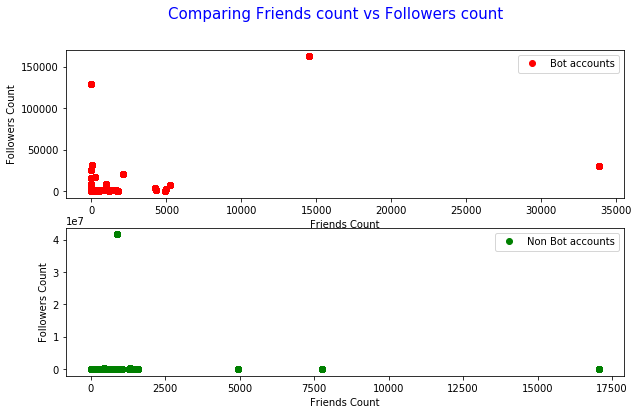

In [61]:
fig, ax = plt.subplots(2,1, figsize=(10,6))
fig.suptitle("Comparing Friends count vs Followers count", fontsize=15, color="b")
ax[0].plot(bot_accountDF.friends_count, bot_accountDF.followers_count, 'o', color="r", label="Bot accounts")
ax[0].set_xlabel("Friends Count")
ax[0].set_ylabel("Followers Count")
ax[1].plot(nonbot_accountDF.friends_count, nonbot_accountDF.followers_count, 'o', color='g', label="Non Bot accounts")
ax[1].set_xlabel("Friends Count")
ax[1].set_ylabel("Followers Count")

ax[0].legend()
ax[1].legend()

** Bot accounts seems to have more followers and than normal accounts which makes sense, as people tend to subscribe handles of news-papers, company accounts and of course the fake news bots(unintentioanlly)**

**Normal accounts seems to have more friends than bot accounts which is understandable since bots don't care of how many friends do they have , all they care about how many posts are they tweeting.**

In [70]:
def getCounts(df):
    count_with_profile_image = len(df[df.default_profile_image==True])
    count_without_profile_image = len(df[df.default_profile_image==False])
    return [count_with_profile_image, count_without_profile_image]


Text(0,0.5,'Count of People')

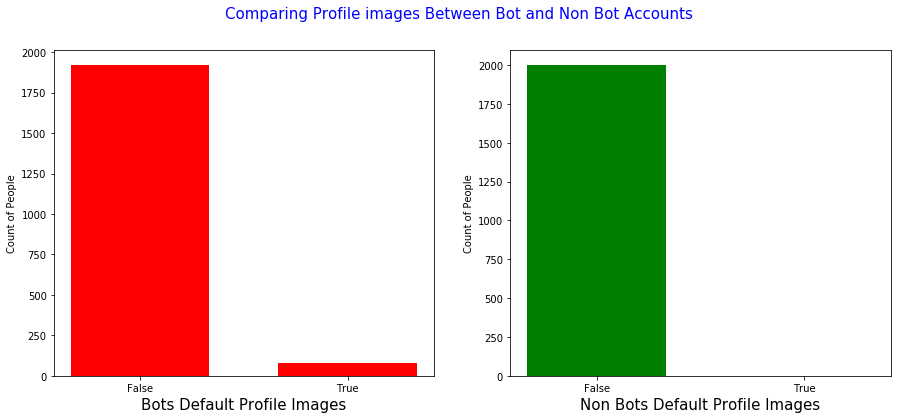

In [111]:
fig, ax = plt.subplots(1,2, figsize=(15,6))
fig.suptitle("Comparing Profile images Between Bot and Non Bot Accounts", fontsize=15, color="b")
x = ["True", "False"]
y_bot = getCounts(bot_accountDF)
y_nonbot = getCounts(nonbot_accountDF)
width = 1/2
ax[0].bar(x, y_bot, width=1/1.5, color="r")
ax[1].bar(x, y_nonbot, width=1/1.5, color = "g")

ax[0].set_xlabel("Bots Default Profile Images", fontsize=15)
ax[0].set_ylabel("Count of People")
#ax[0].set_xticklabels(labels=["True", "False"])
ax[1].set_xlabel("Non Bots Default Profile Images", fontsize=15)
ax[1].set_ylabel("Count of People")
#ax[1].set_xticklabels(labels=["True", "False"])



** So from the plot it does not look there is much difference between both the data in terms of default profile images, I was expecting non bot accounts to have more default images but this just could be a data collection issue ** 

** Let's plot the whole scatter matrix and see if there is any direct relation ship that we can identify and based on that we can do further analysis ** 

<h3> Plotting the Scatter matrix for Bot Accounts </h3>

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000022810D02CC0>,
      dtype=object)

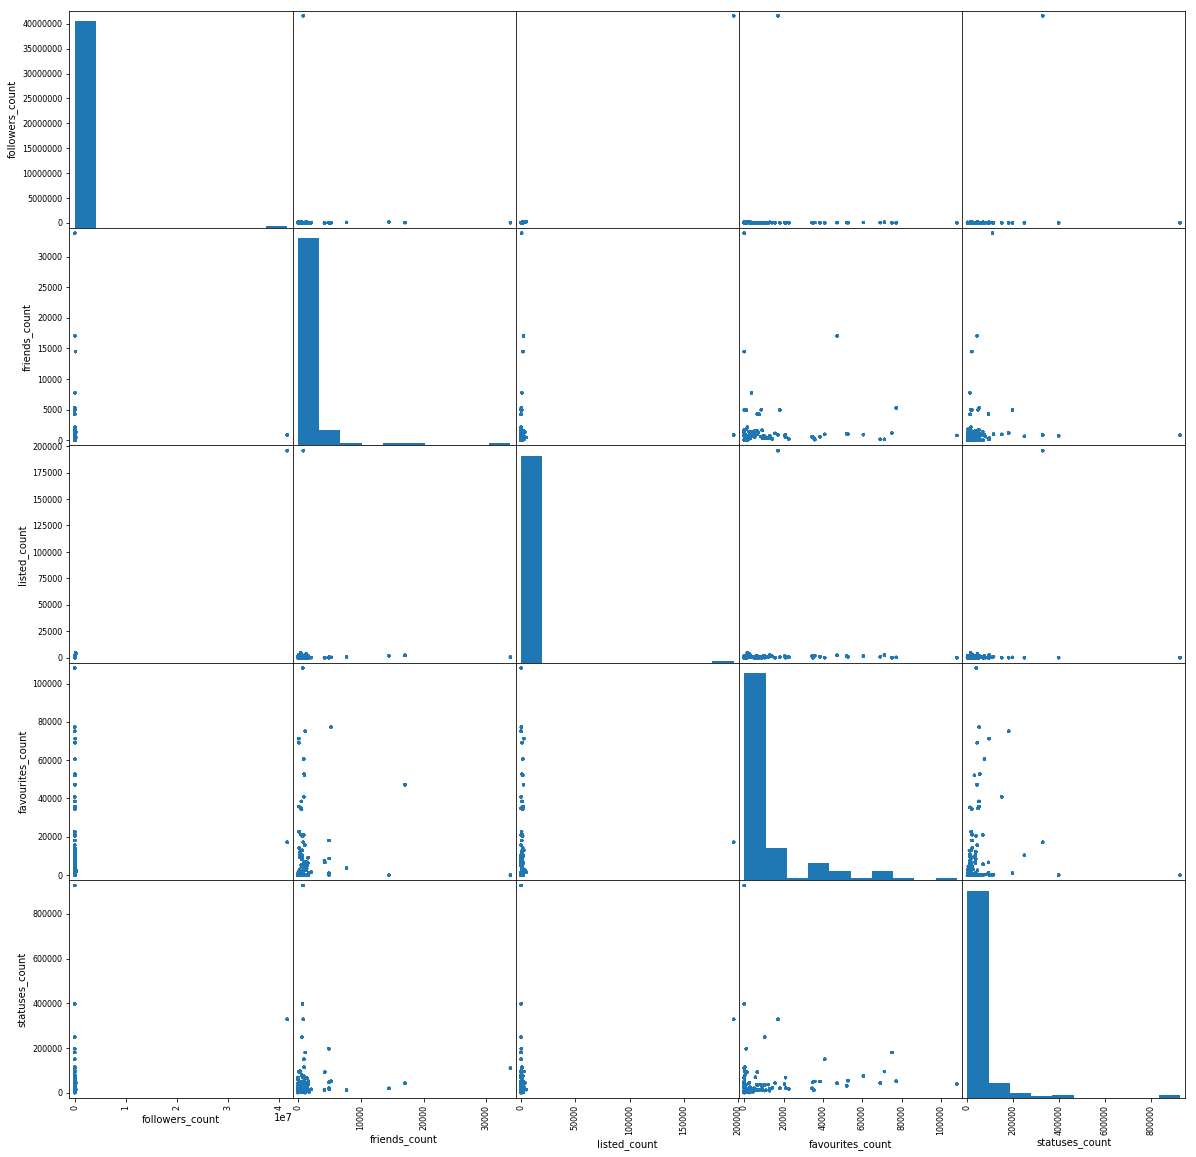

In [24]:
scatter_matrix(bot_accountDF[["followers_count", "friends_count", "listed_count", "favourites_count","statuses_count"]], figsize=(20,20))

<h3> Plotting the Scatter matrix for Non Bot Accounts </h3>

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002280D724C50>,
      dtype=object)

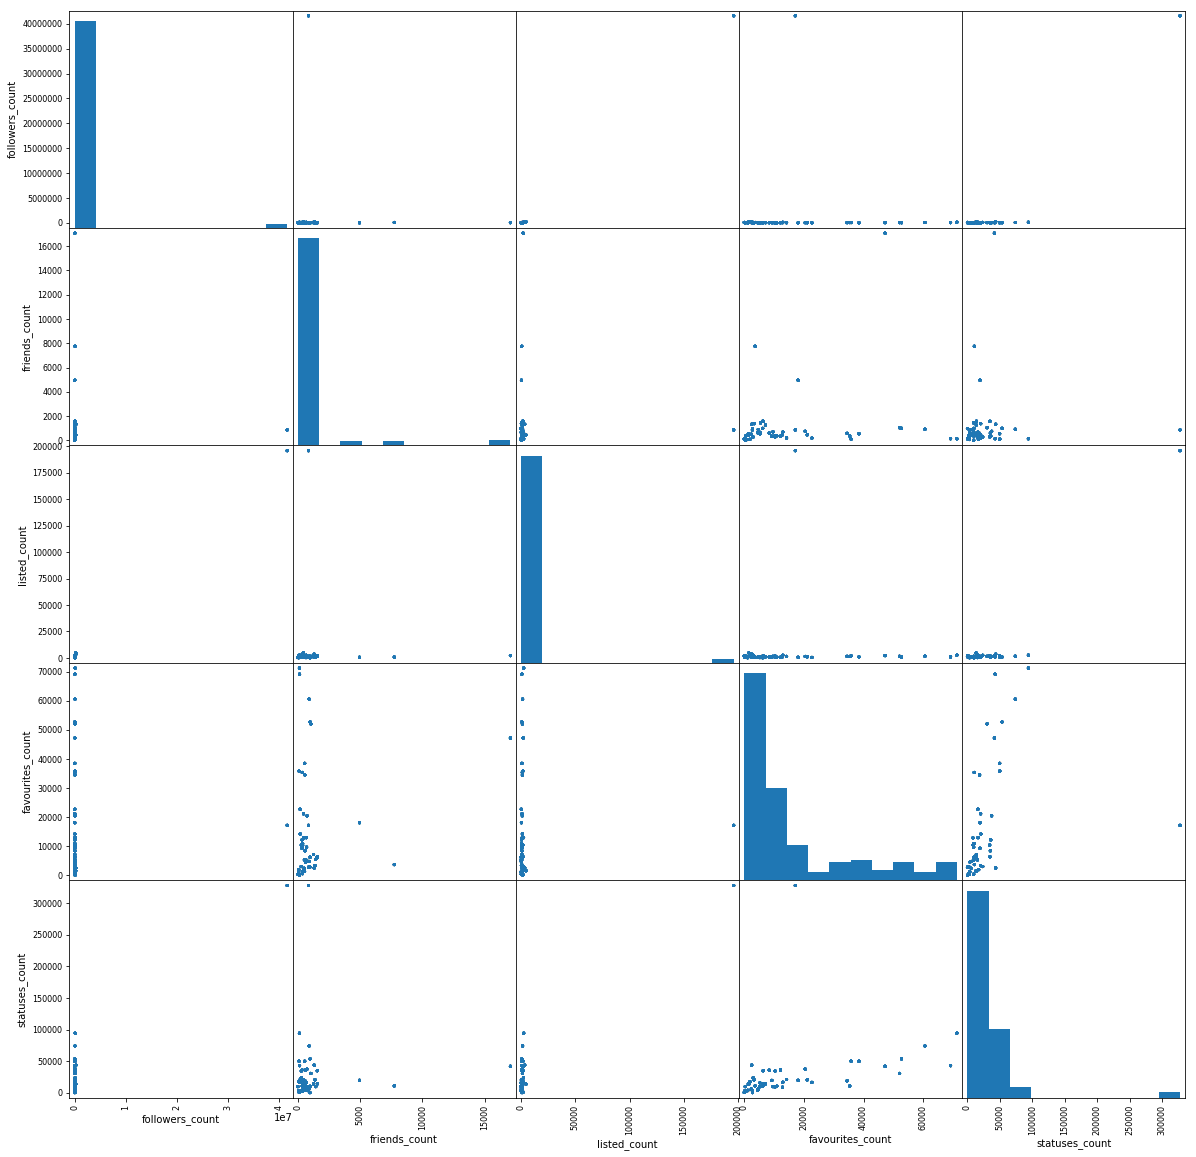

In [112]:
scatter_matrix(nonbot_accountDF[["followers_count", "friends_count", "listed_count", "favourites_count","statuses_count"]], figsize=(20,20))

** There seems to be some positive correlation between favorites count and the status_counts **

<h2> Let's look at the actual tweets from these accounts, we are going to show a <i>WordCloud</i> from both Bot accounts and Non bot accounts </h2>

In [27]:
bot_tweets = tweetsDF[tweetsDF.isBot==1].values
nonbot_tweets = tweetsDF[tweetsDF.isBot==0]
print("Number of tweets by Bots are {} and number of tweets by non bot accounts are {}".format(len(bot_tweets), len(nonbot_tweets)))

Number of tweets by Bots are 5976 and number of tweets by non bot accounts are 4420


In [37]:
bot_tweets_str = ""
for tweet in bot_tweets.full_text:
    bot_tweets_str += ''.join([i if ord(i) < 128 else ' ' for i in tweet])

    
nonbot_tweets_str = ""
for tweet in nonbot_tweets.full_text:
    nonbot_tweets_str += ''.join([i if ord(i) < 128 else ' ' for i in tweet])


In [115]:
def clean_str(string):
    
    string = re.sub(r"[^A-Za-z0-9(),!?\'\`]", " ", string)
    string = re.sub(r"\'s", " \'s", string)
    string = re.sub(r"\'ve", " \'ve", string)
    string = re.sub(r"n\'t", " n\'t", string)
    string = re.sub(r"\'re", " \'re", string)
    string = re.sub(r"\'d", " \'d", string)
    string = re.sub(r"\'ll", " \'ll", string)
    string = re.sub(r",", " , ", string)
    string = re.sub(r"!", " ! ", string)
    string = re.sub(r"\(", " \( ", string)
    string = re.sub(r"\)", " \) ", string)
    string = re.sub(r"\?", " \? ", string)
    string = re.sub(r"\s{2,}", " ", string)
    string = re.sub(r"\s{2,}", " ", string)
    string = re.sub(r"|", "", string)
    string = re.sub(r"u\s", "", string)
    string = re.sub(r'[^\x00-\x7F]+',' ', string)
    return string.strip().lower()

def validate_json(string):
    """
    Tokenization/string cleaning for all datasets except for SST.
    Original taken from https://github.com/yoonkim/CNN_sentence/blob/master/process_data.py
    """
    string = re.sub("\'s", "\"s", string)
    string = re.sub("\'{\r", "\"", string)
    string = re.sub(r"False", " false", string)
    string = re.sub(r"None", "", string)
    
    return string.strip()


# Defining the wordCloud method.
def generate_wordCloud(text, title):
    text = clean_str(text) ## clear the string
    stopwords = set(STOPWORDS)
    extra_stopwords = {'one', 'al','et', 'br', 'Po', 'th', 'sayi', 'fr','wi', 'Unknown','co',
                       'https', 'u\'rt', 'nhttp','text', 'rt', "amp", "nhttps",'u','n\'t'}
    stopwords = stopwords.union(extra_stopwords)
    wc = WordCloud(stopwords=stopwords,
                  max_font_size=100,
                  max_words=100,
                  random_state=30,
                  background_color='white',mask=None).generate(str(text))

    plt.figure(figsize=(15,20))
    plt.imshow(wc, interpolation="bilinear")
    plt.axis('off') # dont show the axes
    plt.title(title, fontdict={'size': 35,'color':"red" ,
                                  'verticalalignment': 'bottom'})
    plt.show()

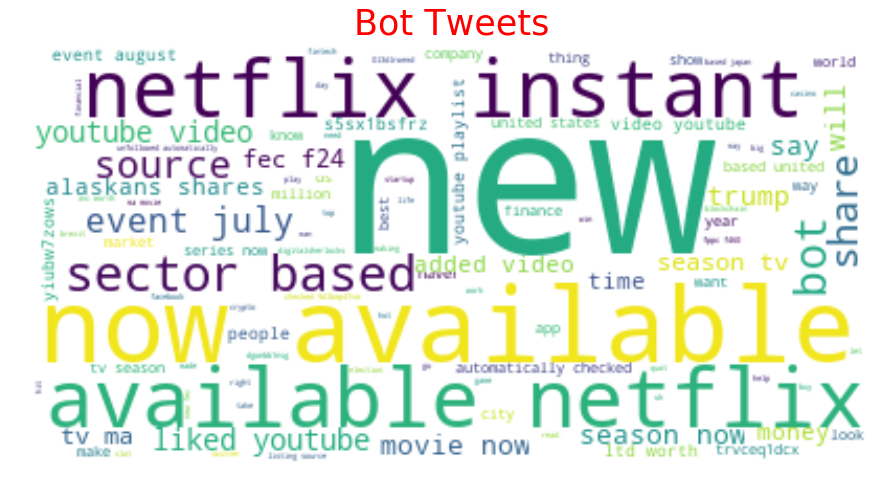

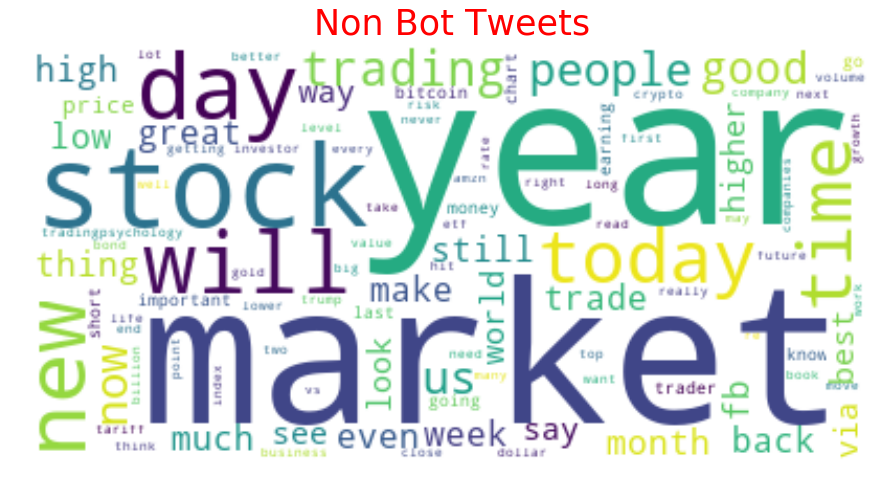

In [116]:
generate_wordCloud(bot_tweets_str, "Bot Tweets")
generate_wordCloud(nonbot_tweets_str, "Non Bot Tweets")

** We can see that the non bots accounts have more meaning full text vs bot accounts are verbiage in some kind which is kind of what you would expect since most bot tweets are very short scripted with a youtube url ta or some link ** 